# Using Factor Analyis of Mixed Data (FAMD) on ADNI Dataset

## Some explanation:

As per https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data we can use FAMD when we have both categorical and numerical variables.
In our case:
        we have Numerical (in the form of 145 ROIs - float) making up the imaging data, 
        and categorical (in the form of 54 SNPs - boolean) making up the genetic data.

"Roughly, we can say that FAMD works as a principal components analysis (PCA) for quantitative variables and as a multiple correspondence analysis (MCA) for qualitative variables."

## Importing Stuff:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from prince.prince.famd import FAMD

## Reading the Dataset:

In [2]:
unique = pd.read_pickle("./DATA/Linearly_Transformed_Unique_Dataset.pkl")
print(unique.shape)
unique.head(15)

(1302, 209)


,PTID,MRID,Date,Age,Sex,DLICV_baseline,APOE4_Alleles,APOE_Genotype,Diagnosis_nearest_2.0,MUSE_Volume_4,...,rs111278892,rs3752246,rs4147929,rs41289512,rs3865444,rs6024870,rs6014724,rs7274581,rs429358,Diagnosis_nearest_2.0_cat
0,002_S_0295,002_S_0295_2006-04-18,2006-04-18,84.742466,0,1485405.375,1.0,E3/E4,CN,-401.428503,...,1,1,1,0,0,0,0,0,1,0
9,002_S_0413,002_S_0413_2006-05-02,2006-05-02,76.283562,1,1364116.000,0.0,E3/E3,CN,596.355045,...,0,1,1,0,1,0,0,0,0,0
24,002_S_0559,002_S_0559_2006-05-23,2006-05-23,79.223288,0,1570479.625,1.0,E3/E4,CN,224.874560,...,0,0,0,0,1,0,0,0,0,0
31,002_S_0619,002_S_0619_2006-06-01,2006-06-01,77.447945,0,1859348.250,2.0,E4/E4,Dementia,2633.277779,...,0,0,0,1,1,0,0,0,2,1
45,002_S_0729,002_S_0729_2006-07-17,2006-07-17,65.056164,1,1166961.750,1.0,E3/E4,MCI,256.289641,...,0,0,0,1,1,0,0,0,1,2
64,002_S_0816,002_S_0816_2006-08-30,2006-08-30,70.767123,0,1444128.125,2.0,E4/E4,Dementia,-126.260419,...,0,0,0,0,1,0,0,0,2,1
69,002_S_0938,002_S_0938_2006-10-05,2006-10-05,82.167123,1,1309685.000,0.0,E3/E3,Dementia,200.102369,...,0,1,1,0,1,0,0,0,0,1
74,002_S_0954,002_S_0954_2006-10-10,2006-10-10,69.198630,1,1075661.500,1.0,E3/E4,MCI,-60.539913,...,2,1,1,0,1,0,0,0,1,2
81,002_S_0955,002_S_0955_2006-10-11,2006-10-11,78.161644,1,1363607.000,1.0,E3/E4,Dementia,1058.028132,...,1,0,0,0,1,0,0,0,1,1
84,002_S_1018,002_S_1018_2006-11-29,2006-11-29,70.658904,1,1355603.000,0.0,E3/E3,Dementia,-485.048304,...,1,1,1,0,0,0,0,0,0,1


## Employ FAMD:

/var/folders/c9/121x4df174j1dqk40d8dkzvw0000gn/T/ipykernel_42629/384686363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[genetic_name] = X[genetic_name].astype('string')


Fitted the model


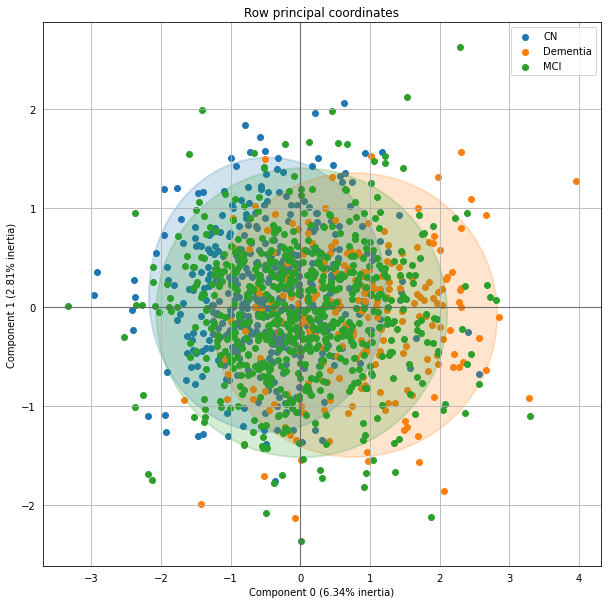

In [28]:
# First get the data to train on: (Both of them together, the algorithm figures out which is which)
l = list(unique.columns)
columns_to_train_on = l[l.index("MUSE_Volume_4"):l.index("rs429358")+1]
X = unique[columns_to_train_on]

# Categorical columns must be type string:
for genetic_name in list(unique.loc[:,"rs4575098":"rs429358"].columns):
    X[genetic_name] = X[genetic_name].astype('string')
X = X.reset_index()

# Get the labels after
Y = unique["Diagnosis_nearest_2.0"].astype('string')

# Number of components is the number to which the dimension will be reduced
# Default checks input, copies dataset
# Needs to be in pandas or np.ndarray format
famd = FAMD(n_components=2, n_iter=10) 
famd.fit(X,y=Y)
print("Fitted the model")

# Make a visualization using the inherited method from MFA:
ax = famd.plot_row_coordinates(X,
                               ax=None,
                               figsize=(10,10),
                               x_component=0,
                               y_component=1,
                               color_labels=list(Y),
                               ellipse_outline=True,
                               ellipse_fill=True,
                               show_points=True)
plt.show()